In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
from snudda.utils.load import SnuddaLoad

In [2]:
group = "distance_complete"
external = os.path.join("/media","jofrony", "2TB", "dardel","current_bgd2","population_unit", 
                        group, "supercomputer", "networks")


In [3]:
e = Experiments()
e.add_experiment(name="0_p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-13-17-37-42_p1.hdf5")
e.add_experiment(name="0_p1_p2",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-13-17-37-42_p1_p2.hdf5")

e.add_experiment(name="45_p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-13"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-13-17-36-57_p1.hdf5")
e.add_experiment(name="45_p1_p2",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-13"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-13-17-36-57_p1_p2.hdf5")

e.add_experiment(name="90_p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-10"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-12-13-30-26_p1.hdf5")
e.add_experiment(name="90_p1_p2",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-10"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-12-13-30-26_p1_p2.hdf5")
experiment_list = e

In [4]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=True)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-13-17-37-42_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-13-17-37-42_p1_p2.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-13/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-13-17-36-57_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/da

In [5]:
neuron_type = "dSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
specific_trace_ids = {k: v[::int(len(v)/160)] for k, v in specific_trace_ids.items()}
specific_trace_ids

{'0_p1': array([ 1466,  1567,  2183,  2708,  3236,  3363,  3429,  3762,  4211,
         4345,  4880,  5007,  5545,  5679,  5840,  5901,  6107,  6169,
         6306,  6493,  6575,  6789,  6850,  6986,  7115,  7184,  7468,
         7571,  7592,  7683,  7703,  7812,  8202,  8253,  8309,  8403,
         8473,  9849,  9988, 10367, 10460, 10540, 10619, 11038, 11138,
        11224, 11353, 11439, 11572, 11670, 11789, 11859, 11922, 12094,
        12237, 12712, 13155, 13554, 13646, 13711, 13893, 13964, 14024,
        14118, 14203, 14271, 14335, 14401, 14923, 15441, 15555, 15653,
        15701, 15852, 15930, 16547, 17395, 17463, 17553, 17668, 17921,
        17986, 18605, 18709, 18784, 18892, 18961, 19035, 19159, 19277,
        19398, 20097, 20131, 20510, 20616, 20639, 20750, 20947, 21113,
        21278, 21348, 21775, 21856, 21927, 22002, 22064, 22229, 22283,
        22337, 23627, 23709, 23817, 23840, 24293, 24575, 24603, 24652,
        24714, 24852, 24891, 25024, 25535, 25631, 25697, 27095, 27168

In [6]:
max_post = specific_trace_ids["0_p1"].size

In [7]:
%%time
depolarisation_blocked = depolarisation_block(data_obj=sl, specific_trace_ids=specific_trace_ids)
connectivity,_,_ = connectivity_analysis(data_obj=sl, pre=["dSPN", "iSPN", "FS"], post=neuron_type, max_post=max_post, 
                                     test_populations=specific_trace_ids)
frequency_analysis_dict_dspn = frequency_analysis(data_obj=sl, neuron_type=neuron_type, 
                                                  trace_ids=specific_trace_ids, parameters={"start": 0.5, "end": 2.5})

CPU times: user 6min 1s, sys: 1min 25s, total: 7min 26s
Wall time: 10min 3s


In [8]:
%%time
frequency_analysis_dict = {f"{i}" : dict() for i in ["0","45","90"]}
import matplotlib.pyplot as plt
for k in frequency_analysis_dict:
    control = f"{k}_p1"
    p1p2 =  f"{k}_p1_p2"
    d = sl.get_data(name=control)
    d1 = sl.get_data(name=p1p2)
    ids = specific_trace_ids[control]
    for i in ids:
        if frequency_analysis_dict_dspn[control][i] > 0 and frequency_analysis_dict_dspn[p1p2][i] > 0:
            diff = frequency_analysis_dict_dspn[p1p2][i] - frequency_analysis_dict_dspn[control][i]
            frequency_analysis_dict[k].update({i: diff})
            if False:
                plt.figure()
                plt.title(f"{diff} Hz")
                v = d.get_voltage(neuron_id=i)
                plt.plot(v,c="black")
                v1 = d1.get_voltage(neuron_id=i)
                plt.plot(v1,c="red")
                plt.show()
        

CPU times: user 2.07 ms, sys: 522 µs, total: 2.59 ms
Wall time: 3.7 ms


In [9]:
do_feature=False

In [10]:
os = dict()
us = dict()
for ks in ["0","45", "90"]:
    o = dict()
    u = dict()
    for i in frequency_analysis_dict[ks]:

        if i in connectivity[f"{ks}_p1"] and not(depolarisation_blocked[f"{ks}_p1_p2"][i]):

            sums=0
            diffs = frequency_analysis_dict[ks][i]
            for r, k in connectivity[f"{ks}_p1"][i].items():
                sums+=k

            if sums > 500 and diffs < -10 and do_feature:
                u.update({i: dict(num_synapses=sums,diff_Hz=diffs)})

            o.update({i: dict(num_synapses=sums,diff_Hz=diffs)})
    os.update({ks: o})
    us.update({ks: u})

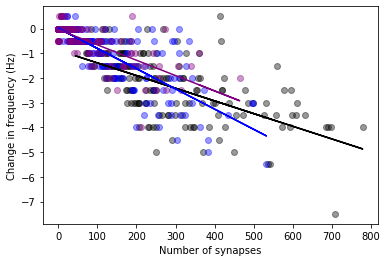

In [11]:
import numpy as np

cs = {"0":"black","45": "blue","90":"purple"}
for k in ["0","45","90"]:
    x = list()
    y = list()
    for i in os[k]:
        plt.scatter([os[k][i]["num_synapses"]],[os[k][i]["diff_Hz"]], c=cs[k],alpha=0.4)
        x.append(os[k][i]["num_synapses"])
        y.append(os[k][i]["diff_Hz"])
        if i in u:
            plt.scatter([us[k][i]["num_synapses"]],[us[k][i]["diff_Hz"]], c=cs[k],alpha=0.4)
    a, b = np.polyfit(x, y, 1)

    #add points to plot
    x = np.array(x)
    #add line of best fit to plot
    plt.plot(x, a*x+b, c=cs[k])
plt.xlabel("Number of synapses")
plt.ylabel("Change in frequency (Hz)")
plt.savefig("Num_synapse_Frequency.svg")

In [12]:
%%time
e_tmps = dict()
for e in ["0","45","90"]:
    tmps = list()
    synapses = sl.experiments[f"{e}_p1"]["network_structure"].data["synapses"]
    for s in [*os[e].keys()]:
        presynaptic = np.where(synapses.T[1] == s)
        
        tmps.append(len(presynaptic[0]))
    e_tmps.update({e: tmps})      
    
        


CPU times: user 1min 20s, sys: 7.33 s, total: 1min 27s
Wall time: 1min 28s


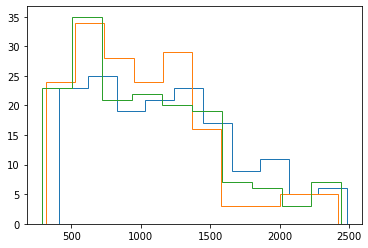

In [13]:
for e in e_tmps:
    plt.hist(e_tmps[e],histtype="step")

In [14]:
%%time
e_tmps = dict()
for e in ["0","45","90"]:
    tmps = list()
    synapses = sl.experiments[f"{e}_p1"]["network_structure"].data["synapses"]
    for s in [*os[e].keys()]:
        presynaptic = np.where(synapses.T[1] == s)
        if len(presynaptic[0]) > 2000:
            tmps.append(s)
    e_tmps.update({e: tmps})      
    
        


CPU times: user 1min 22s, sys: 8.25 s, total: 1min 30s
Wall time: 1min 30s


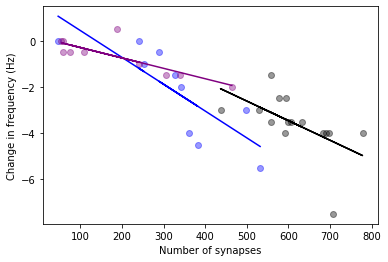

In [15]:
import numpy as np

cs = {"0":"black","45": "blue","90":"purple"}
for k in ["0","45","90"]:
    x = list()
    y = list()
    for i in os[k]:
        
        if i in e_tmps[f"{k}"]:
            plt.scatter([os[k][i]["num_synapses"]],[os[k][i]["diff_Hz"]], c=cs[k],alpha=0.4)
            x.append(os[k][i]["num_synapses"])
            y.append(os[k][i]["diff_Hz"])
            if i in u:
                plt.scatter([us[k][i]["num_synapses"]],[us[k][i]["diff_Hz"]], c=cs[k],alpha=0.4)
    a, b = np.polyfit(x, y, 1)

    #add points to plot
    x = np.array(x)
    #add line of best fit to plot
    plt.plot(x, a*x+b, c=cs[k])
plt.xlabel("Number of synapses")
plt.ylabel("Change in frequency (Hz)")
plt.savefig("Num_synapse_Frequency.svg")

In [16]:
import h5py
import os
with h5py.File(os.path.join("synapses_frequency",f"{group}_synapse_frequency.h5"), 'w') as hf:
    
    hf_add = hf.create_group("depolarisation_blocked")
    for f,data in depolarisation_blocked.items():
        grp = hf_add.create_group(f)
        for i, true_or_false in data.items():
            grp.create_dataset(f"{i}", data=np.array([true_or_false]))
            
    hf_add = hf.create_group("connectivity")
    for f,data in connectivity.items():
        grp = hf_add.create_group(str(f))
        for dest, pre in data.items():
            grps = grp.create_group(str(dest))
            for i, num in pre.items():
                grps.create_dataset(f"{i}", data=np.array([num]))
            
    hf_add = hf.create_group("frequency_analysis_dict_dspn")
    for f,data in frequency_analysis_dict_dspn.items():
        grp = hf_add.create_group(str(f))
        for i, freq in data.items():
            grp.create_dataset(f"{i}", data=np.array([freq]))
            
    
    hf.close()


In [17]:
with h5py.File(os.path.join("synapses_frequency",f"{group}_synapses.h5"), 'w') as f:
        
    for e in ["0","45","90"]:
        synapses = sl.experiments[f"{e}_p1"]["network_structure"].data["synapses"]
        f.create_dataset(f"{e}", data=synapses)
        